# Kitti 3d object detection 


In this notebook we explore the 2d bounding box labels of the Kitti 3d detection dataset.

## images

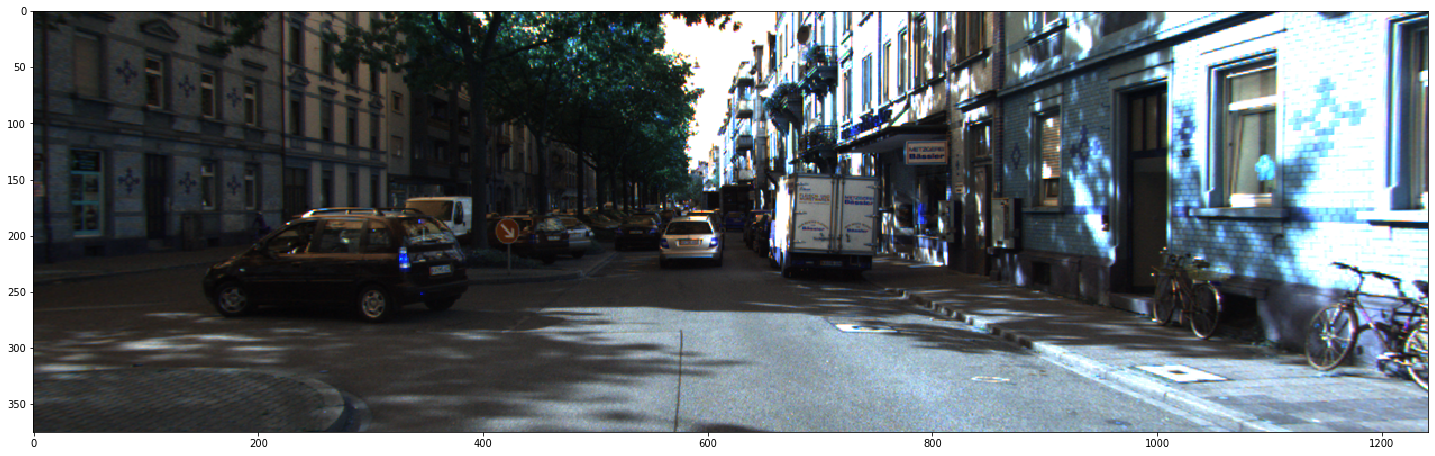

In [1]:
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 14)

from app import app
from kitti.data import read_label_3d, get_image_names

image_names = get_image_names(app.DataConfig.image_dir)
f = image_names[1]

image_file = app.DataConfig.image_dir + f
calibration_file = app.DataConfig.calibration_dir + f.replace('png', 'txt')
label_file = app.DataConfig.label_dir + f.replace('png', 'txt')
labels = read_label_3d(label_file)
img = cv2.imread(image_file)

plt.imshow(img)

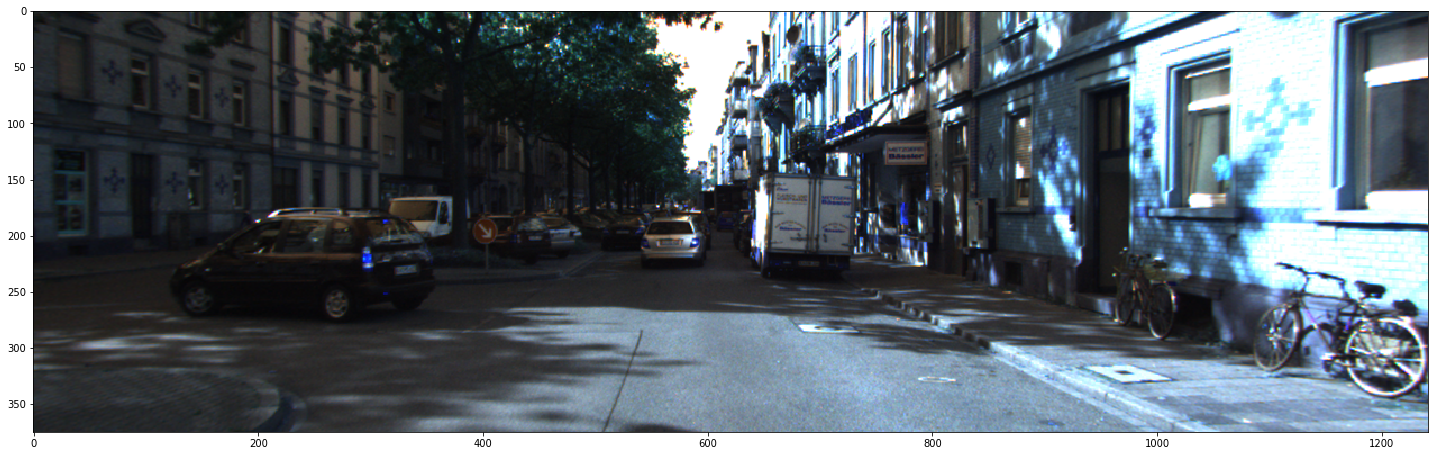

In [2]:
img3 = cv2.imread(image_file.replace('image_2', 'image_3'))
plt.imshow(img3)

## Stereo camera 

#### Overlaying images of left and right camera

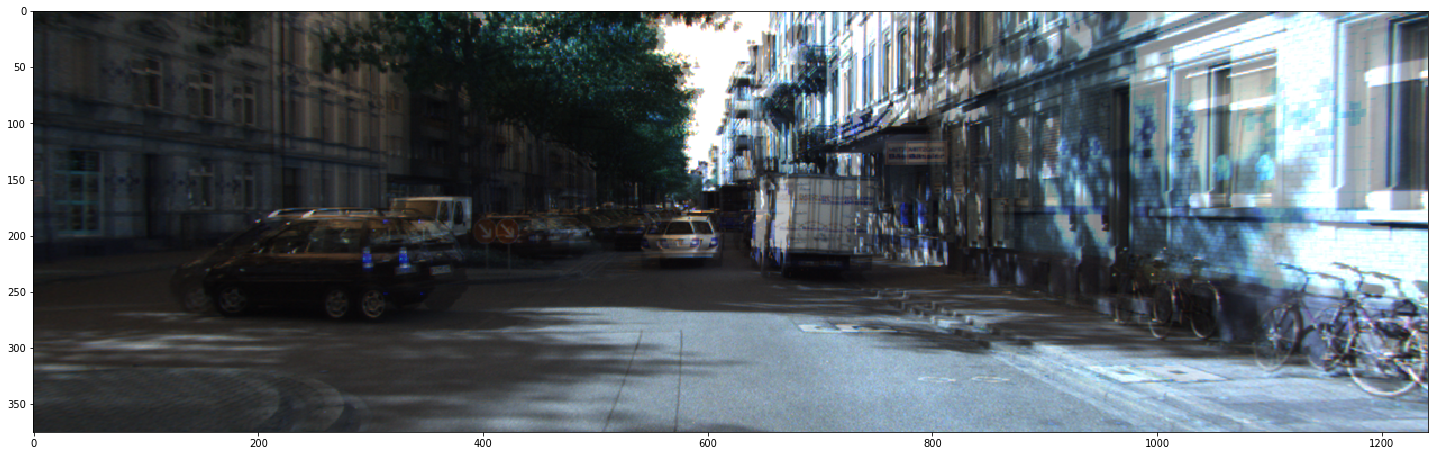

In [3]:
combined = cv2.addWeighted(img,0.5,img3,0.5,0)
plt.imshow(combined)

### The label files

In [4]:
label_file

'/home/ubuntu/data/kitti_object/training/label_2/002444.txt'

In [5]:
%cat $label_file

Car 0.00 0 -1.53 558.02 183.32 614.08 229.33 1.36 1.69 3.38 -0.76 1.72 23.58 -1.56
Car 0.00 0 -2.42 150.74 173.76 395.89 277.66 1.66 1.63 3.83 -6.00 1.70 12.85 -2.85
Car 0.00 1 -2.32 365.24 179.81 484.51 226.55 1.45 1.61 3.96 -6.30 1.71 24.25 -2.57
Car 0.00 2 -2.28 402.45 181.27 500.84 220.10 1.36 1.57 3.73 -6.06 1.70 27.28 -2.50
Car 0.00 0 -1.48 517.68 183.35 563.31 213.16 1.25 1.74 3.66 -3.14 1.74 32.88 -1.58
Van 0.00 3 -1.75 652.18 142.38 757.14 238.31 2.42 2.03 5.49 2.54 1.68 21.12 -1.63
Van 0.00 3 1.90 317.07 162.77 406.52 220.27 2.10 1.96 4.63 -9.83 1.76 28.87 1.57
Car 0.00 2 -1.56 578.79 178.19 617.91 213.89 1.52 1.67 3.61 -0.55 1.77 32.80 -1.58
Cyclist 0.00 3 2.07 188.65 178.15 221.05 211.45 1.48 0.60 1.59 -18.52 1.73 32.94 1.56
DontCare -1 -1 -10 628.31 177.10 676.27 215.68 -1 -1 -1 -1000 -1000 -1000 -10


In [6]:
from tabulate import tabulate

In [7]:
print(tabulate(labels, headers='keys'))

    label       truncated    occluded    alpha    bbox_xmin    bbox_ymin    bbox_xmax    bbox_ymax    dim_height    dim_width    dim_length     loc_x     loc_y     loc_z    rotation_y    score
--  --------  -----------  ----------  -------  -----------  -----------  -----------  -----------  ------------  -----------  ------------  --------  --------  --------  ------------  -------
 0  Car                 0           0    -1.53       558.02       183.32       614.08       229.33          1.36         1.69          3.38     -0.76      1.72     23.58         -1.56      nan
 1  Car                 0           0    -2.42       150.74       173.76       395.89       277.66          1.66         1.63          3.83     -6         1.7      12.85         -2.85      nan
 2  Car                 0           1    -2.32       365.24       179.81       484.51       226.55          1.45         1.61          3.96     -6.3       1.71     24.25         -2.57      nan
 3  Car                 0          

## Exploring 2d labels

In [8]:
coordinates = labels[[col for col in labels.columns if col.startswith('bbox')]].astype(int)
coordinates.head()

bbox_xmin  bbox_ymin  bbox_xmax  bbox_ymax
0        558        183        614        229
1        150        173        395        277
2        365        179        484        226
3        402        181        500        220
4        517        183        563        213

In [9]:
import numpy as np

In [10]:
corners = coordinates.apply(lambda x: ((x.bbox_xmin, x.bbox_ymin), (x.bbox_xmin, x.bbox_ymax), \
(x.bbox_xmax, x.bbox_ymin), (x.bbox_xmax, x.bbox_ymax)), axis=1)

In [11]:
corners.head()

0    ((558, 183), (558, 229), (614, 183), (614, 229))
1    ((150, 173), (150, 277), (395, 173), (395, 277))
2    ((365, 179), (365, 226), (484, 179), (484, 226))
3    ((402, 181), (402, 220), (500, 181), (500, 220))
4    ((517, 183), (517, 213), (563, 183), (563, 213))
dtype: object

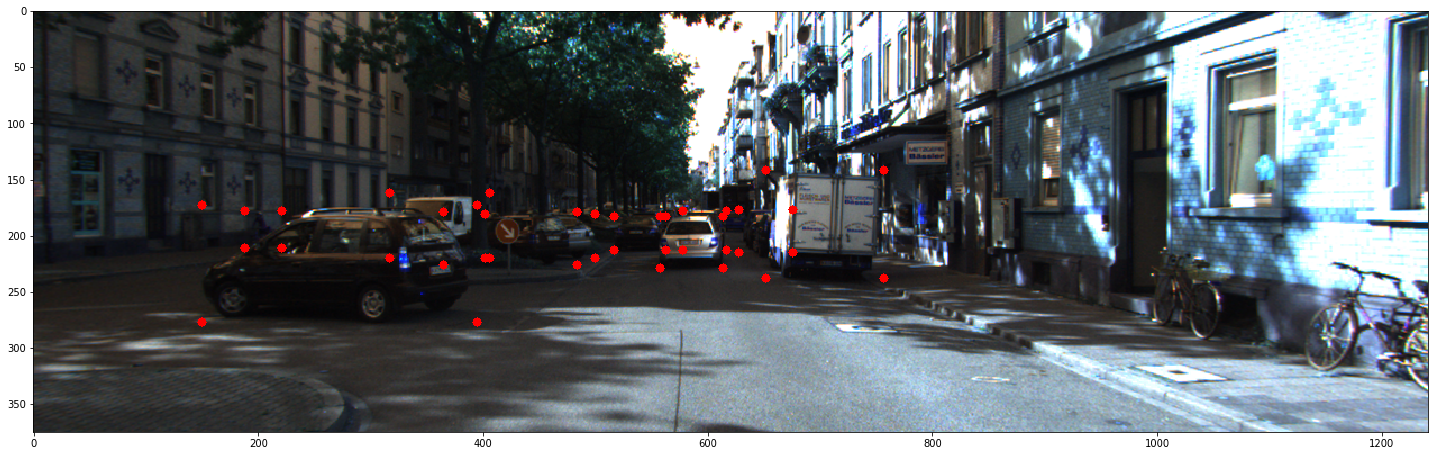

In [12]:
for box in corners:
    for corner in box:
        cv2.circle(img, corner, 1, (255, 0, 0), 5)
        # cv.Circle(img, center, radius, color, thickness=1, lineType=8, shift=0)

plt.imshow(img)

In [13]:
labels[['label'] + [col for col in labels.columns if col.startswith('bbox')]]

label  bbox_xmin  bbox_ymin  bbox_xmax  bbox_ymax
0       Car     558.02     183.32     614.08     229.33
1       Car     150.74     173.76     395.89     277.66
2       Car     365.24     179.81     484.51     226.55
3       Car     402.45     181.27     500.84     220.10
4       Car     517.68     183.35     563.31     213.16
5       Van     652.18     142.38     757.14     238.31
6       Van     317.07     162.77     406.52     220.27
7       Car     578.79     178.19     617.91     213.89
8   Cyclist     188.65     178.15     221.05     211.45
9  DontCare     628.31     177.10     676.27     215.68

## Drawing bounding boxes

In [16]:
boxes = labels.apply(lambda x: ((int(x.bbox_xmin), int(x.bbox_ymin)), (int(x.bbox_xmax), int(x.bbox_ymax))), axis=1)

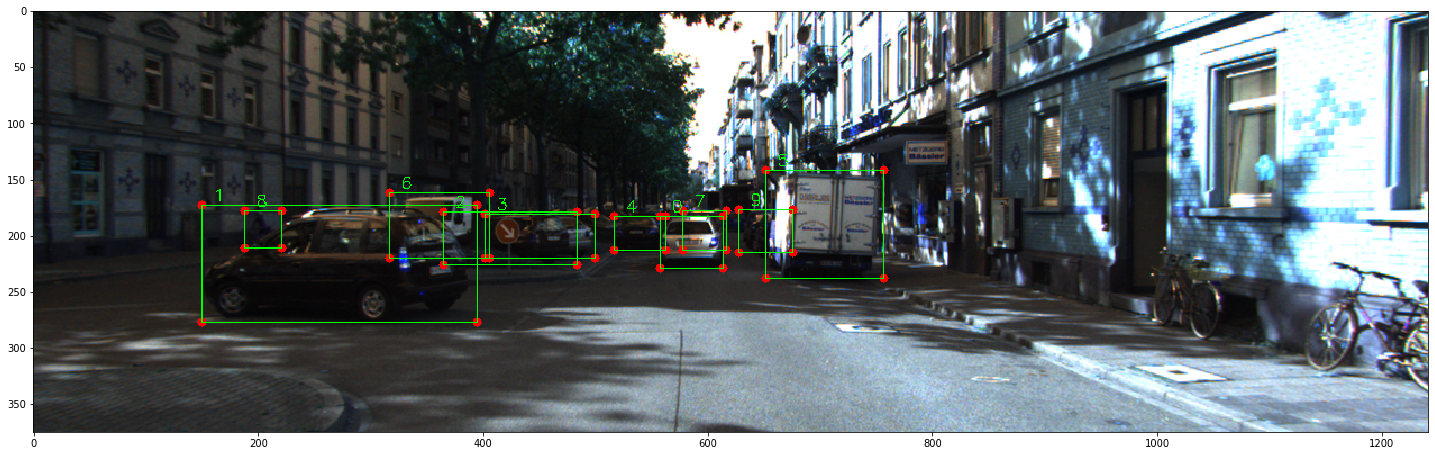

In [17]:
for i, box in enumerate(boxes):
    img = cv2.rectangle(img, box[0], box[1], (0, 255, 0))
    img = cv2.putText(img, str(i), (box[0][0] + 10, box[0][1] - 4) , cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

plt.imshow(img) 